# AB InBev Beer Challenge

## Configuración y funciones a utilizar

In [1]:
from utils import *
from functools import reduce

## Extracción de los datos

In [2]:
# Read the csv files of the atributes
file_path_atributes = "../data/raw/atributos.csv"
atributes = read_csv_with_lowercase_columns(file_path_atributes)
categorical = ["bussinesssegment","concentracion","nse","segmentounico","canal"]
numerical = ["totalvolumen","skudistintospromediosxorden","skudistintostotales"]
# Read the csv files of the transactions
file_path_transactions = "../data/raw/transacciones.csv"
transactions = read_csv_with_lowercase_columns(file_path_transactions)
# Display the first rows of the DataFrame of the transactions
transactions.head()

,account_id,sku_id,invoice_date,order_id,items_phys_cases
i64,i64,i64,i64,str,f64
0,430606,7038,20220729,"""512-3880249-0""",100.0
1,323267,14933,20220729,"""512-3882307-0""",1.0
2,357825,21971,20220723,"""512-3852880-0""",8.0
3,444926,7038,20220805,"""512-3913163-0""",20.0
4,450771,7030,20220816,"""512-3957000-0""",5.0


In [3]:
# Display the first rows of the DataFrame of the atribues
atributes.head()

,poc,bussinesssegment,totalvolumen,skudistintospromediosxorden,skudistintostotales,concentracion,nse,segmentounico,canal
i64,i64,str,f64,f64,i64,str,str,str,str
10,175519,"""HighUsage""",5.18752,4.1,16,"""Medio""","""Bajo""","""4.Activos""","""Kioscos/Maxikioscos"""
13,28533,"""HighUsage""",4.76866,3.9211,34,"""Alto""","""Medio""","""4.Activos""","""Tradicional"""
19,32182,"""PowerUsage""",5.9793,6.75,34,"""Alto""","""Medio""","""4.Activos""","""Tradicional"""
20,327976,"""MinimalUsage""",6.02852,3.5833,14,"""Alto""","""Medio""","""4.Activos""","""COMIDA"""
24,354640,"""PowerUsage""",7.525,3.2,18,"""Bajo""","""S/D""","""4.Activos""","""Tradicional"""


## Preprocesamiento necesario para EDA

En las los atributos:

* Calidad de los datos:
    * Revisar valores nulos
    * Revisar valores fuera de rango
    * Cuantificar outliers

En las transacciones:

* Calidad de los datos:
    *Revisar valores nulos
    * Revisar valores fuera de rango
    * Cuantificar outliers

Transformaciones y/o agregaciones:

* Convertir invoice_date a un formato de fecha: Aunque actualmente es un entero,convertiremos la variable invoice_date a un tipo de dato de fecha para realizar análisis temporales.

* Crear dataset aparte con agrupación por cliente: Dado que estamos interesados en el comportamiento de compra de los clientes, vamos a agrupar los datos por account_id para analizar patrones de compra individuales.

* Crear dataset aparte con agrupación por item: Dado que también estamos interesados en el comportamiento de compra sobre los items, vamos a agrupar los datos por sku_id para analizar patrones de compra que se dan en general para los items.


### Datos de atributos de los clientes

#### Calidad de los datos:
* Revisar valores nulos 
* Revisar valores fuera de rango
* Cuantificar outliers

##### **Análsis de valores nulos**

* Al notar que las distribuciones del dataset de no nulos es distinta, analizamos la relación entre las variables categóricas en cuestion: nse, concentracion, segmento unico y canal donde validamos que no son independientes entre si. Dado esto y que por su definición los efectos del NSE en latinoamerica normalmente están contenidos la cantidad de comercios en la zona debido a la segregación de las ciudades, es que hemos decidido eliminar la columna del NSE para no alterar las distribuciones de las métricas de interés.

* Con respecto al resto de los valores nulos, sumados corresponden al 8.8% de los datos y podemos notar que no generan un cambio en la distribución de las métricas de interés cuando eliminamos sus filas. Sin embargo, al analizar quienes son los clientes que hay en los valores nulos, podemos notar que solo un 20% es de bajo poder de compra y que dentro de los que tienen poco uso de la plataforma, hay varios con un potencial bueno de compra para el negocio por lo que se decide no hacer la eliminación de clientes.

* Un proxy de la concentración deberían ser las métricas de venta y las otras categorías, por lo que imputamos los valores faltantes de las variables categóricas concentración, segmento único y canal utilizando dichas variables explicativas

In [4]:
# Reemplazar "S/D" por nulos en las columnas "nse" y "concentración"
atributes = replace_sd_with_null(atributes, ["nse", "concentracion"])
# Revisar valores nulos en el DataFrame
null_values_df = check_null_values(atributes)
# Mostrar el resultado
print(null_values_df)
atributes[numerical].describe()

shape: (10, 3)
┌─────────────────────────────┬────────────┬─────────────────┐
│ column                      ┆ null_count ┆ null_percentage │
│ ---                         ┆ ---        ┆ ---             │
│ str                         ┆ u32        ┆ f64             │
╞═════════════════════════════╪════════════╪═════════════════╡
│                             ┆ 0          ┆ 0.0             │
│ poc                         ┆ 0          ┆ 0.0             │
│ bussinesssegment            ┆ 0          ┆ 0.0             │
│ totalvolumen                ┆ 0          ┆ 0.0             │
│ skudistintospromediosxorden ┆ 0          ┆ 0.0             │
│ skudistintostotales         ┆ 0          ┆ 0.0             │
│ concentracion               ┆ 326        ┆ 7.409091        │
│ nse                         ┆ 1023       ┆ 23.25           │
│ segmentounico               ┆ 75         ┆ 1.704545        │
│ canal                       ┆ 14         ┆ 0.318182        │
└─────────────────────────────┴─────────

statistic,totalvolumen,skudistintospromediosxorden,skudistintostotales
str,f64,f64,f64
"""count""",4400.0,4400.0,4400.0
"""null_count""",0.0,0.0,0.0
"""mean""",22.272537,5.911031,27.832727
"""std""",106.642437,3.227491,21.640289
"""min""",0.02124,0.7027,1.0
"""25%""",2.12124,3.6667,12.0
"""50%""",5.6011,5.1429,22.0
"""75%""",13.95536,7.3542,38.0
"""max""",4274.44416,33.0,157.0


##### NSE

shape: (9, 4)
┌────────────┬──────────────┬─────────────────────────────┬─────────────────────┐
│ statistic  ┆ totalvolumen ┆ skudistintospromediosxorden ┆ skudistintostotales │
│ ---        ┆ ---          ┆ ---                         ┆ ---                 │
│ str        ┆ f64          ┆ f64                         ┆ f64                 │
╞════════════╪══════════════╪═════════════════════════════╪═════════════════════╡
│ count      ┆ 1075.0       ┆ 1075.0                      ┆ 1075.0              │
│ null_count ┆ 0.0          ┆ 0.0                         ┆ 0.0                 │
│ mean       ┆ 26.813149    ┆ 6.182723                    ┆ 25.525581           │
│ std        ┆ 114.105641   ┆ 3.501458                    ┆ 19.875404           │
│ min        ┆ 0.02508      ┆ 0.75                        ┆ 1.0                 │
│ 25%        ┆ 1.82192      ┆ 3.8333                      ┆ 11.0                │
│ 50%        ┆ 4.8178       ┆ 5.5                         ┆ 20.0                │
│ 

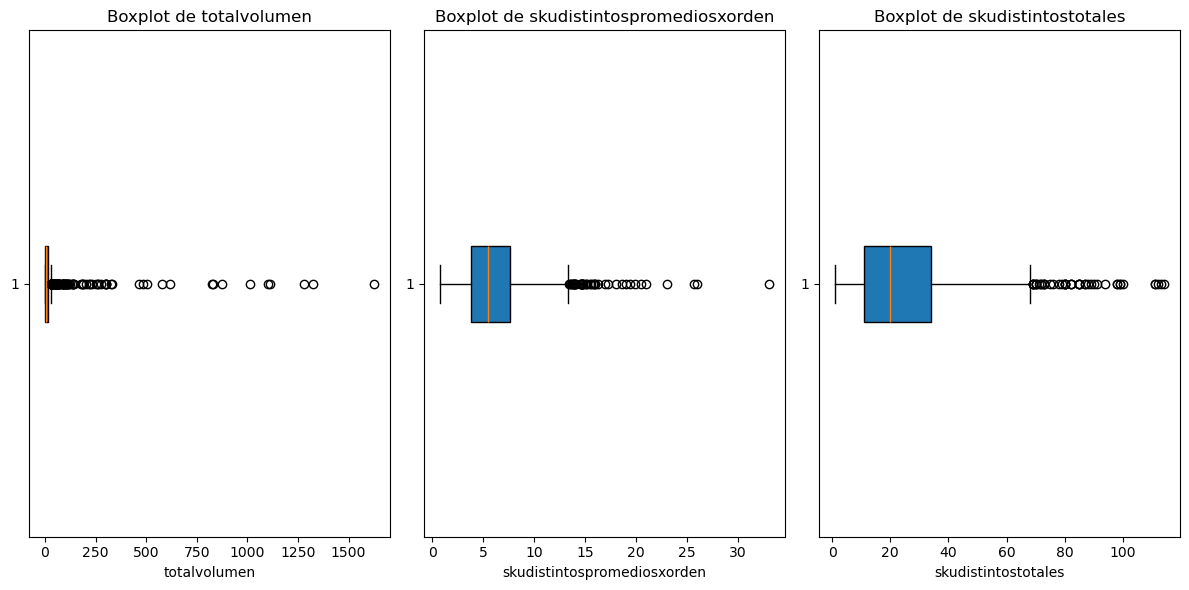

In [5]:
# filtramos los nulos
df_with_nulls = filter_rows_with_nulls(atributes)
# Mostrar las características de los valores nulos
print(df_with_nulls[numerical].describe())
plot_boxplots(df_with_nulls,numerical)

In [6]:
chi2_matrix(chi2_test, atributes, categorical, confidence_level=0.99)

,bussinesssegment,concentracion,nse,segmentounico,canal
bussinesssegment,False,True,True,True,True
concentracion,True,False,True,True,True
nse,True,True,False,True,True
segmentounico,True,True,True,False,True
canal,True,True,True,True,False


In [7]:
categorical = ["bussinesssegment","concentracion","segmentounico","canal"]
# Eliminar la columna "nse" del DataFrame
atributes = atributes.drop("nse")
print(check_null_values(atributes))
atributes.shape

shape: (9, 3)
┌─────────────────────────────┬────────────┬─────────────────┐
│ column                      ┆ null_count ┆ null_percentage │
│ ---                         ┆ ---        ┆ ---             │
│ str                         ┆ u32        ┆ f64             │
╞═════════════════════════════╪════════════╪═════════════════╡
│                             ┆ 0          ┆ 0.0             │
│ poc                         ┆ 0          ┆ 0.0             │
│ bussinesssegment            ┆ 0          ┆ 0.0             │
│ totalvolumen                ┆ 0          ┆ 0.0             │
│ skudistintospromediosxorden ┆ 0          ┆ 0.0             │
│ skudistintostotales         ┆ 0          ┆ 0.0             │
│ concentracion               ┆ 326        ┆ 7.409091        │
│ segmentounico               ┆ 75         ┆ 1.704545        │
│ canal                       ┆ 14         ┆ 0.318182        │
└─────────────────────────────┴────────────┴─────────────────┘


(4400, 9)

##### Imputación de valores nulos

* Para las variables concentración, canal y segmento único haremos imputación de datos

* Usamo un modelo de regresión logística ordenada para entender la significancia estádistica e impacto de las variables numéricas en la cateogoría target

* Luego, usamos las variables numéricas relevantes y las otras variables categóricas para imputar los valores faltantes de concentración, segmento único y canal utilizado, usando el algoritmo de Random Forest. El F1-score en datos de test del modelo que se usa para imputar da 0.53, 0.61 y 0.57, respectivamente. Debido a la baja performance del modelo que usamos para imputar y como mecanimos de validación, a medida que vamos haciendo las predicciones, vamos verificando que las distribuciones por categoría de las variables numéricas no cambien de forma significativa (nos fijamos en los percentiles, no en los promedios). Salvo casos aislados como el canal "Otros-ref", en general no hubo cambios de distibución importantes. 

In [8]:
count_distinct_grouped_by(df_with_nulls, y_column="poc", x_columns=["segmentounico","bussinesssegment"],z_columns=["segmentounico","bussinesssegment"])

segmentounico,bussinesssegment,poc_distinct_count,total_first_column,poc_percentage
str,str,u32,u32,f64
"""5.Select""","""PowerUsage""",89,144,61.805556
"""5.Select""","""HighUsage""",55,144,38.194444
"""4.Activos""","""PowerUsage""",124,400,31.0
"""4.Activos""","""MinimalUsage""",46,400,11.5
"""4.Activos""","""MediumUsage""",111,400,27.75
"""4.Activos""","""HighUsage""",119,400,29.75
"""3.Potenciales""","""PowerUsage""",2,34,5.882353
"""3.Potenciales""","""MinimalUsage""",14,34,41.176471
"""3.Potenciales""","""MediumUsage""",13,34,38.235294


In [9]:
# Filter the original DataFrame to keep only rows without null values
df_without_nulls = filter_rows_without_nulls(atributes)
print(df_without_nulls[numerical].describe())

shape: (9, 4)
┌────────────┬──────────────┬─────────────────────────────┬─────────────────────┐
│ statistic  ┆ totalvolumen ┆ skudistintospromediosxorden ┆ skudistintostotales │
│ ---        ┆ ---          ┆ ---                         ┆ ---                 │
│ str        ┆ f64          ┆ f64                         ┆ f64                 │
╞════════════╪══════════════╪═════════════════════════════╪═════════════════════╡
│ count      ┆ 4011.0       ┆ 4011.0                      ┆ 4011.0              │
│ null_count ┆ 0.0          ┆ 0.0                         ┆ 0.0                 │
│ mean       ┆ 21.644617    ┆ 5.81108                     ┆ 28.328596           │
│ std        ┆ 104.005686   ┆ 3.109883                    ┆ 21.90761            │
│ min        ┆ 0.02124      ┆ 0.7027                      ┆ 1.0                 │
│ 25%        ┆ 2.20068      ┆ 3.625                       ┆ 12.0                │
│ 50%        ┆ 5.7351       ┆ 5.0                         ┆ 22.0                │
│ 

In [10]:
# Ejemplo de uso:
result = fit_ordered_logistic_regression(df_without_nulls, 'concentracion', numerical)
result.summary()

Optimization terminated successfully.
         Current function value: 0.781970
         Iterations: 18
         Function evaluations: 22
         Gradient evaluations: 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                encoded   Log-Likelihood:                -3136.5
Model:                   OrderedModel   AIC:                             6283.
Method:            Maximum Likelihood   BIC:                             6314.
Date:                Thu, 15 Aug 2024                                         
Time:                        09:03:24                                         
No. Observations:                4011                                         
Df Residuals:                    4006                                         
Df Model:                           3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
totalvolumen                    0.0006      0.000      1.486      0.137      -0.000       0.001
skudistintospromediosxorden    -0.1246      0.014     -8.633      0.000      -0.153      -0.096
skudistintostotales            -0.0023      0.002     -1.156      0.248      -0.006       0.002
0/1                            -0.6794      0.072     -9.472      0.000      -0.820      -0.539
1/2                            -2.1040      0.091    -23.086      0.000      -2.283      -1.925
===============================================================================================
"""

In [11]:
# Ejemplo de uso:
atributes_updated ,cf_report, accuracy, cross_val_mean= fill_missing_values(atributes, 'concentracion', ['skudistintostotales'], ['bussinesssegment', 'segmentounico', 'canal'])
# Evaluar el modelo
print(cf_report)
print("Accuracy:", accuracy)
print("Cross-validation mean score:", cross_val_mean)
# Mostrar las primeras filas del DataFrame actualizado
check_null_values(atributes_updated)

              precision    recall  f1-score   support

        Alto       0.58      0.55      0.57       427
        Bajo       0.09      0.03      0.05        29
       Medio       0.49      0.55      0.52       359

    accuracy                           0.53       815
   macro avg       0.39      0.38      0.38       815
weighted avg       0.53      0.53      0.53       815

Accuracy: 0.5325153374233129
Cross-validation mean score: 0.5256156173136185


column,null_count,null_percentage
str,u32,f64
"""column_0""",0,0.0
"""poc""",0,0.0
"""bussinesssegment""",0,0.0
"""totalvolumen""",0,0.0
"""skudistintospromediosxorden""",0,0.0
"""skudistintostotales""",0,0.0
"""concentracion""",0,0.0
"""segmentounico""",75,1.704545
"""canal""",14,0.318182


In [12]:
print(count_distinct_grouped_by(atributes_updated, y_column="poc", x_columns=["concentracion"],z_columns=["poc_percentage"]))
count_distinct_grouped_by(df_without_nulls, y_column="poc", x_columns=["concentracion"],z_columns=["poc_percentage"])

shape: (3, 4)
┌───────────────┬────────────────────┬────────────────────┬────────────────┐
│ concentracion ┆ poc_distinct_count ┆ total_first_column ┆ poc_percentage │
│ ---           ┆ ---                ┆ ---                ┆ ---            │
│ str           ┆ u32                ┆ i32                ┆ f64            │
╞═══════════════╪════════════════════╪════════════════════╪════════════════╡
│ Alto          ┆ 2319               ┆ 4400               ┆ 52.704545      │
│ Medio         ┆ 1954               ┆ 4400               ┆ 44.409091      │
│ Bajo          ┆ 127                ┆ 4400               ┆ 2.886364       │
└───────────────┴────────────────────┴────────────────────┴────────────────┘


concentracion,poc_distinct_count,total_first_column,poc_percentage
str,u32,i32,f64
"""Alto""",2089,4011,52.081775
"""Medio""",1805,4011,45.001247
"""Bajo""",117,4011,2.916978


In [13]:
group_and_describe_with_percentiles(df_without_nulls, "concentracion", numerical).sort('concentracion')

concentracion,totalvolumen_mean,skudistintospromediosxorden_mean,skudistintostotales_mean,totalvolumen_median,skudistintospromediosxorden_median,skudistintostotales_median,totalvolumen_std_dev,skudistintospromediosxorden_std_dev,skudistintostotales_std_dev,totalvolumen_p25,totalvolumen_p50,totalvolumen_p75,skudistintospromediosxorden_p25,skudistintospromediosxorden_p50,skudistintospromediosxorden_p75,skudistintostotales_p25,skudistintostotales_p50,skudistintostotales_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Alto""",18.892961,6.402027,31.218765,5.85912,5.6818,25.0,71.696408,3.337813,23.44018,2.12358,5.85912,14.87472,4.0,5.6818,8.0,13.0,25.0,43.0
"""Bajo""",20.168322,4.902802,22.777778,5.81728,4.2857,14.0,73.472624,2.382811,21.367116,2.158,5.81728,13.63538,3.125,4.2857,6.3571,10.0,14.0,31.0
"""Medio""",24.924913,5.186029,25.34349,5.6224,4.5556,20.0,133.1482,2.718291,19.518015,2.29222,5.6224,13.56136,3.3333,4.5556,6.3182,11.0,20.0,34.0


In [14]:
group_and_describe_with_percentiles(atributes_updated, "concentracion", numerical).sort('concentracion')

concentracion,totalvolumen_mean,skudistintospromediosxorden_mean,skudistintostotales_mean,totalvolumen_median,skudistintospromediosxorden_median,skudistintostotales_median,totalvolumen_std_dev,skudistintospromediosxorden_std_dev,skudistintostotales_std_dev,totalvolumen_p25,totalvolumen_p50,totalvolumen_p75,skudistintospromediosxorden_p25,skudistintospromediosxorden_p50,skudistintospromediosxorden_p75,skudistintostotales_p25,skudistintostotales_p50,skudistintostotales_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Alto""",19.318276,6.483111,30.451488,5.64996,5.75,24.0,74.823073,3.461682,23.165108,2.05066,5.64996,14.39806,4.0,5.75,8.125,13.0,24.0,43.0
"""Bajo""",19.218336,5.156998,23.330709,6.01514,4.4211,15.0,70.596346,2.633552,22.222559,2.32184,6.01514,13.63538,3.1818,4.4211,6.65,10.0,15.0,32.0
"""Medio""",25.977151,5.281097,25.0174,5.53681,4.61065,20.0,136.47339,2.823124,19.200367,2.24466,5.537,13.3329,3.3333,4.6111,6.4211,11.0,20.0,33.0


In [15]:
# Ejemplo de uso:
result = fit_ordered_logistic_regression(df_without_nulls, 'segmentounico', numerical)
result.summary()

Optimization terminated successfully.
         Current function value: 1.177408
         Iterations: 27
         Function evaluations: 32
         Gradient evaluations: 32


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                encoded   Log-Likelihood:                -4722.6
Model:                   OrderedModel   AIC:                             9459.
Method:            Maximum Likelihood   BIC:                             9503.
Date:                Thu, 15 Aug 2024                                         
Time:                        09:03:26                                         
No. Observations:                4011                                         
Df Residuals:                    4004                                         
Df Model:                           3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
totalvolumen                    0.0044      0.001      6.374      0.000       0.003       0.006
skudistintospromediosxorden    -0.1253      0.013     -9.892      0.000      -0.150      -0.100
skudistintostotales             0.0690      0.002     29.609      0.000       0.064       0.074
0/1                            -0.5033      0.068     -7.402      0.000      -0.637      -0.370
1/2                             0.0757      0.034      2.199      0.028       0.008       0.143
2/3                            -1.9356      0.094    -20.528      0.000      -2.120      -1.751
3/4                             1.0603      0.023     46.715      0.000       1.016       1.105
===============================================================================================
"""

In [16]:
# Ejemplo de uso:
atributes_updated ,cf_report, accuracy, cross_val_mean= fill_missing_values(atributes_updated, 'segmentounico', ['skudistintostotales','skudistintospromediosxorden','totalvolumen'], ['bussinesssegment', 'concentracion', 'canal'])
# Evaluar el modelo
print(cf_report)
print("Accuracy:", accuracy)
print("Cross-validation mean score:", cross_val_mean)
# Mostrar las primeras filas del DataFrame actualizado
check_null_values(atributes_updated)

               precision    recall  f1-score   support

  1.Inactivos       0.67      0.68      0.68       184
    2.Masivos       0.52      0.47      0.49       161
3.Potenciales       0.15      0.07      0.10        28
    4.Activos       0.61      0.70      0.65       367
     5.Select       0.71      0.56      0.62       125

     accuracy                           0.61       865
    macro avg       0.53      0.50      0.51       865
 weighted avg       0.61      0.61      0.61       865

Accuracy: 0.6127167630057804
Cross-validation mean score: 0.6190751445086705


column,null_count,null_percentage
str,u32,f64
"""column_0""",0,0.0
"""poc""",0,0.0
"""bussinesssegment""",0,0.0
"""totalvolumen""",0,0.0
"""skudistintospromediosxorden""",0,0.0
"""skudistintostotales""",0,0.0
"""concentracion""",0,0.0
"""segmentounico""",0,0.0
"""canal""",14,0.318182


In [17]:
print(count_distinct_grouped_by(df_without_nulls, y_column="poc", x_columns=["segmentounico"],z_columns=["poc_percentage"]))
count_distinct_grouped_by(atributes_updated, y_column="poc", x_columns=["segmentounico"],z_columns=["poc_percentage"])

shape: (5, 4)
┌───────────────┬────────────────────┬────────────────────┬────────────────┐
│ segmentounico ┆ poc_distinct_count ┆ total_first_column ┆ poc_percentage │
│ ---           ┆ ---                ┆ ---                ┆ ---            │
│ str           ┆ u32                ┆ i32                ┆ f64            │
╞═══════════════╪════════════════════╪════════════════════╪════════════════╡
│ 4.Activos     ┆ 1795               ┆ 4011               ┆ 44.751932      │
│ 1.Inactivos   ┆ 804                ┆ 4011               ┆ 20.044877      │
│ 2.Masivos     ┆ 708                ┆ 4011               ┆ 17.651458      │
│ 5.Select      ┆ 595                ┆ 4011               ┆ 14.834206      │
│ 3.Potenciales ┆ 109                ┆ 4011               ┆ 2.717527       │
└───────────────┴────────────────────┴────────────────────┴────────────────┘


segmentounico,poc_distinct_count,total_first_column,poc_percentage
str,u32,i32,f64
"""4.Activos""",1934,4400,43.954545
"""1.Inactivos""",888,4400,20.181818
"""2.Masivos""",820,4400,18.636364
"""5.Select""",631,4400,14.340909
"""3.Potenciales""",127,4400,2.886364


In [18]:
group_and_describe_with_percentiles(df_without_nulls, "segmentounico", numerical)

segmentounico,totalvolumen_mean,skudistintospromediosxorden_mean,skudistintostotales_mean,totalvolumen_median,skudistintospromediosxorden_median,skudistintostotales_median,totalvolumen_std_dev,skudistintospromediosxorden_std_dev,skudistintostotales_std_dev,totalvolumen_p25,totalvolumen_p50,totalvolumen_p75,skudistintospromediosxorden_p25,skudistintospromediosxorden_p50,skudistintospromediosxorden_p75,skudistintostotales_p25,skudistintostotales_p50,skudistintostotales_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""2.Masivos""",9.887889,5.629337,20.268362,4.48982,5.0,17.0,26.073617,3.049452,14.904553,1.90926,4.50136,8.09796,3.5,5.0,7.0714,9.0,17.0,28.0
"""3.Potenciales""",45.953118,8.111235,35.449541,12.77314,7.5625,33.0,178.23672,3.311973,16.730703,7.95744,12.77314,28.38672,6.2,7.5625,9.75,24.0,33.0,44.0
"""4.Activos""",17.971171,6.006615,30.945404,7.61332,5.2692,26.0,46.946604,3.086993,19.832192,3.30046,7.61332,15.79512,3.8333,5.2692,7.35,16.0,26.0,41.0
"""1.Inactivos""",2.4877,4.476126,12.120647,1.56015,4.0,11.0,3.664449,2.250522,8.163438,0.76258,1.56126,2.98188,3.0,4.0,5.3333,6.0,11.0,16.0
"""5.Select""",68.149044,6.819948,50.621849,17.3101,6.049,47.0,238.30285,3.47014,26.189863,8.35212,17.3101,36.2526,4.3,6.049,8.9815,30.0,47.0,68.0


In [19]:
group_and_describe_with_percentiles(atributes_updated, "segmentounico", numerical)

segmentounico,totalvolumen_mean,skudistintospromediosxorden_mean,skudistintostotales_mean,totalvolumen_median,skudistintospromediosxorden_median,skudistintostotales_median,totalvolumen_std_dev,skudistintospromediosxorden_std_dev,skudistintostotales_std_dev,totalvolumen_p25,totalvolumen_p50,totalvolumen_p75,skudistintospromediosxorden_p25,skudistintospromediosxorden_p50,skudistintospromediosxorden_p75,skudistintostotales_p25,skudistintostotales_p50,skudistintostotales_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""1.Inactivos""",2.444146,4.570655,12.154279,1.5582,4.125,11.0,3.545036,2.339944,8.181279,0.73942,1.55904,2.95866,3.0,4.125,5.6667,6.0,11.0,16.0
"""5.Select""",73.224607,6.874734,50.275753,17.38062,6.0147,47.0,245.73012,3.671826,25.971597,8.34152,17.38062,37.51956,4.25,6.0147,8.9815,30.0,47.0,67.0
"""4.Activos""",18.454372,6.101257,30.858842,7.619305,5.375,26.0,51.234575,3.15085,19.749052,3.2891,7.62095,15.78716,3.8667,5.375,7.5,16.0,26.0,41.0
"""2.Masivos""",9.583716,5.770779,19.503659,4.3525,5.04285,16.0,25.447217,3.214566,14.506745,1.77432,4.3571,7.7421,3.5769,5.05,7.2,9.0,16.0,27.0
"""3.Potenciales""",47.831755,8.503668,33.645669,11.991,7.7857,31.0,181.278135,3.670715,16.539768,6.4103,11.991,26.50188,6.3571,7.7857,10.8,23.0,31.0,43.0


In [20]:
# Ejemplo de uso:
result = fit_ordered_logistic_regression(df_without_nulls, 'canal', numerical)
result.summary()

Optimization terminated successfully.
         Current function value: 1.174149
         Iterations: 33
         Function evaluations: 38
         Gradient evaluations: 38


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                encoded   Log-Likelihood:                -4709.5
Model:                   OrderedModel   AIC:                             9441.
Method:            Maximum Likelihood   BIC:                             9510.
Date:                Thu, 15 Aug 2024                                         
Time:                        09:03:27                                         
No. Observations:                4011                                         
Df Residuals:                    4000                                         
Df Model:                           3                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
totalvolumen                   -0.0011      0.000     -2.964      0.003      -0.002      -0.000
skudistintospromediosxorden    -0.0476      0.013     -3.597      0.000      -0.073      -0.022
skudistintostotales             0.0013      0.002      0.630      0.529      -0.003       0.005
0/1                            -3.4076      0.100    -34.110      0.000      -3.603      -3.212
1/2                            -0.8398      0.108     -7.764      0.000      -1.052      -0.628
2/3                            -4.3778      0.578     -7.571      0.000      -5.511      -3.245
3/4                            -0.0096      0.052     -0.184      0.854      -0.111       0.092
4/5                            -2.0348      0.118    -17.292      0.000      -2.265      -1.804
5/6                             0.0301      0.034      0.897      0.370      -0.036       0.096
6/7                            -2.9886      0.145    -20.603      0.000      -3.273      -2.704
7/8                            -6.8497      1.004     -6.825      0.000      -8.817      -4.883
===============================================================================================
"""

In [21]:
# Ejemplo de uso:
atributes_updated ,cf_report, accuracy, cross_val_mean= fill_missing_values(atributes_updated, 'canal', ['skudistintospromediosxorden','totalvolumen'], ['bussinesssegment', 'concentracion', 'segmentounico'])
# Evaluar el modelo
print(cf_report)
print("Accuracy:", accuracy)
print("Cross-validation mean score:", cross_val_mean)
# Mostrar las primeras filas del DataFrame actualizado
check_null_values(atributes_updated)

/opt/miniconda3/envs/challenge_abinbev/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


                     precision    recall  f1-score   support

       Autoservicio       0.53      0.39      0.45        44
             BEBIDA       0.00      0.00      0.00        16
             COMIDA       0.40      0.28      0.33        98
    ENTRETENIMIENTO       0.33      0.18      0.24        11
      Instituciones       0.00      0.00      0.00         7
      KA Minoristas       0.00      0.00      0.00         7
Kioscos/Maxikioscos       0.31      0.23      0.26       164
          Mayorista       0.60      0.50      0.55        12
          OTROS REF       0.20      0.50      0.29         2
        Tradicional       0.70      0.84      0.76       517

           accuracy                           0.60       878
          macro avg       0.31      0.29      0.29       878
       weighted avg       0.55      0.60      0.57       878

Accuracy: 0.5979498861047836
Cross-validation mean score: 0.6134508699415975


column,null_count,null_percentage
str,u32,f64
"""column_0""",0,0.0
"""poc""",0,0.0
"""bussinesssegment""",0,0.0
"""totalvolumen""",0,0.0
"""skudistintospromediosxorden""",0,0.0
"""skudistintostotales""",0,0.0
"""concentracion""",0,0.0
"""segmentounico""",0,0.0
"""canal""",0,0.0


In [22]:
print(count_distinct_grouped_by(df_without_nulls, y_column="poc", x_columns=["canal"],z_columns=["poc_percentage"]))
count_distinct_grouped_by(atributes_updated, y_column="poc", x_columns=["canal"],z_columns=["poc_percentage"])

shape: (9, 4)
┌─────────────────────┬────────────────────┬────────────────────┬────────────────┐
│ canal               ┆ poc_distinct_count ┆ total_first_column ┆ poc_percentage │
│ ---                 ┆ ---                ┆ ---                ┆ ---            │
│ str                 ┆ u32                ┆ i32                ┆ f64            │
╞═════════════════════╪════════════════════╪════════════════════╪════════════════╡
│ Tradicional         ┆ 2491               ┆ 4011               ┆ 62.104213      │
│ Kioscos/Maxikioscos ┆ 781                ┆ 4011               ┆ 19.471454      │
│ COMIDA              ┆ 364                ┆ 4011               ┆ 9.075044       │
│ Autoservicio        ┆ 168                ┆ 4011               ┆ 4.188482       │
│ BEBIDA              ┆ 85                 ┆ 4011               ┆ 2.119172       │
│ ENTRETENIMIENTO     ┆ 71                 ┆ 4011               ┆ 1.770132       │
│ Mayorista           ┆ 47                 ┆ 4011               ┆ 1.17177

canal,poc_distinct_count,total_first_column,poc_percentage
str,u32,i32,f64
"""Tradicional""",2665,4400,60.568182
"""Kioscos/Maxikioscos""",821,4400,18.659091
"""COMIDA""",415,4400,9.431818
"""Autoservicio""",186,4400,4.227273
"""BEBIDA""",101,4400,2.295455
"""ENTRETENIMIENTO""",79,4400,1.795455
"""Mayorista""",53,4400,1.204545
"""Instituciones""",43,4400,0.977273
"""KA Minoristas""",18,4400,0.409091


In [23]:
group_and_describe_with_percentiles(df_without_nulls, "canal", numerical)

canal,totalvolumen_mean,skudistintospromediosxorden_mean,skudistintostotales_mean,totalvolumen_median,skudistintospromediosxorden_median,skudistintostotales_median,totalvolumen_std_dev,skudistintospromediosxorden_std_dev,skudistintostotales_std_dev,totalvolumen_p25,totalvolumen_p50,totalvolumen_p75,skudistintospromediosxorden_p25,skudistintospromediosxorden_p50,skudistintospromediosxorden_p75,skudistintostotales_p25,skudistintostotales_p50,skudistintostotales_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Bar/Restaurant""",25.168753,7.095233,27.333333,20.70388,8.125,28.0,17.600543,2.461856,9.0185,20.70388,20.70388,44.57174,8.125,8.125,8.875,28.0,28.0,36.0
"""Tradicional""",15.819326,5.677488,27.995986,5.26854,5.0,22.0,67.008491,3.025904,21.178776,2.14448,5.26854,11.2006,3.5556,5.0,7.0,12.0,22.0,38.0
"""Kioscos/Maxikioscos""",12.850601,5.814194,28.075544,4.51048,5.0,21.0,64.287668,3.288445,22.439678,1.68868,4.51048,11.12188,3.6111,5.0,7.1364,11.0,21.0,38.0
"""ENTRETENIMIENTO""",18.777553,7.065762,19.0,6.6653,6.0,13.0,40.733979,3.641164,16.155494,2.64,6.6653,18.01776,4.1429,6.0,9.4545,7.0,13.0,26.0
"""OTROS REF""",0.71946,4.0,6.0,0.71946,4.0,6.0,null,null,null,0.71946,0.71946,0.71946,4.0,4.0,4.0,6.0,6.0,6.0
"""COMIDA""",19.02737,6.895146,23.777473,8.53539,6.4347,22.0,28.621773,3.13276,15.240313,3.2976,8.5656,24.0522,4.5833,6.4483,8.75,11.0,22.0,32.0
"""Mayorista""",341.319174,3.909168,25.87234,166.7332,3.5263,21.0,657.108155,1.625721,20.127439,78.57696,166.7332,326.49782,3.0,3.5263,4.8846,11.0,21.0,34.0
"""BEBIDA""",36.492496,6.144196,18.435294,12.40448,5.6818,17.0,74.463988,3.23918,13.837016,2.13636,12.40448,40.8229,3.75,5.6818,8.0,7.0,17.0,24.0
"""Autoservicio""",58.89905,5.249761,54.083333,28.33092,4.64175,51.0,134.633948,2.701114,29.252036,18.13642,28.72142,47.46982,3.5385,4.6471,6.3182,37.0,51.0,69.0


In [24]:
group_and_describe_with_percentiles(atributes_updated, "canal", numerical)

canal,totalvolumen_mean,skudistintospromediosxorden_mean,skudistintostotales_mean,totalvolumen_median,skudistintospromediosxorden_median,skudistintostotales_median,totalvolumen_std_dev,skudistintospromediosxorden_std_dev,skudistintostotales_std_dev,totalvolumen_p25,totalvolumen_p50,totalvolumen_p75,skudistintospromediosxorden_p25,skudistintospromediosxorden_p50,skudistintospromediosxorden_p75,skudistintostotales_p25,skudistintostotales_p50,skudistintostotales_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""KA Minoristas""",33.19843,5.952689,23.111111,8.93561,4.4197,17.0,52.849231,3.645564,14.76438,4.8864,9.42046,28.58948,3.0,4.9,7.2857,11.0,17.0,34.0
"""Tradicional""",16.825898,5.765766,27.815385,5.113,5.0,22.0,73.298865,3.16468,20.998598,2.09766,5.113,11.05942,3.5714,5.0,7.1389,12.0,22.0,38.0
"""BEBIDA""",32.453697,6.20932,18.118812,7.8888,5.625,15.0,69.455122,3.226456,13.862386,2.05506,7.8888,36.06468,3.75,5.625,8.0,7.0,15.0,24.0
"""ENTRETENIMIENTO""",18.038128,7.284276,19.860759,6.78,6.5,14.0,38.813941,3.717107,16.571318,2.64,6.78,16.2,4.5,6.5,9.6667,8.0,14.0,29.0
"""Kioscos/Maxikioscos""",14.823838,5.849775,27.830694,4.40692,5.0,21.0,84.713668,3.314463,22.342115,1.61206,4.40692,11.12188,3.6,5.0,7.1667,11.0,21.0,38.0
"""Instituciones""",18.204722,6.872633,17.511628,6.098,6.0,16.0,38.469111,3.183014,12.044307,1.545,6.098,15.14662,4.5,6.0,9.7222,9.0,16.0,22.0
"""OTROS REF""",4.28747,6.7125,14.1875,4.05886,6.03845,9.5,3.170279,3.261597,10.380872,0.93462,4.33632,6.6012,3.875,6.0769,10.0,6.0,11.0,25.0
"""Bar/Restaurant""",25.168753,7.095233,27.333333,20.70388,8.125,28.0,17.600543,2.461856,9.0185,20.70388,20.70388,44.57174,8.125,8.125,8.875,28.0,28.0,36.0
"""COMIDA""",17.925747,6.894312,22.821687,8.10584,6.4,21.0,27.53412,3.226332,15.072835,2.6552,8.10584,22.82666,4.5,6.4,8.7,10.0,21.0,31.0


In [25]:
# Me quedo con el dataset con datos imputados y borro el temporal
atributes = atributes_updated
del atributes_updated

##### **Análisis de outliers**

* No observamos valores que parecieran estar fuera de rango (por ejemplo: volúmenes menores que 0), pero si encontramos outliers en la variable que nos entrega el volumen de hectolitros adquiridos por el cliente en los tres meses cerrados de análisis (Junio a Agosto)

* Al revisar los outliers vemos que en el volumen es en donde es más determinante su presencia, pues el 98% está por debajo de 100 hectolitros, pero luego tenemos un 2% que varia entre 100 y 4274, que además tiene distribuciones diferentes para la variedad de productos (skudistintostotales) y la cantidad de sku por orden (skudistintospromediosxorden) que pide. Si bien esto es algo a considerar al momento de hacer predicciones, no es algo en lo que debamos intervenir necesariamente, por lo que de momento quedará como está.

shape: (9, 4)
┌────────────┬──────────────┬─────────────────────────────┬─────────────────────┐
│ statistic  ┆ totalvolumen ┆ skudistintospromediosxorden ┆ skudistintostotales │
│ ---        ┆ ---          ┆ ---                         ┆ ---                 │
│ str        ┆ f64          ┆ f64                         ┆ f64                 │
╞════════════╪══════════════╪═════════════════════════════╪═════════════════════╡
│ count      ┆ 4400.0       ┆ 4400.0                      ┆ 4400.0              │
│ null_count ┆ 0.0          ┆ 0.0                         ┆ 0.0                 │
│ mean       ┆ 22.272537    ┆ 5.911031                    ┆ 27.832727           │
│ std        ┆ 106.642437   ┆ 3.227491                    ┆ 21.640289           │
│ min        ┆ 0.02124      ┆ 0.7027                      ┆ 1.0                 │
│ 25%        ┆ 2.12124      ┆ 3.6667                      ┆ 12.0                │
│ 50%        ┆ 5.6011       ┆ 5.1429                      ┆ 22.0                │
│ 

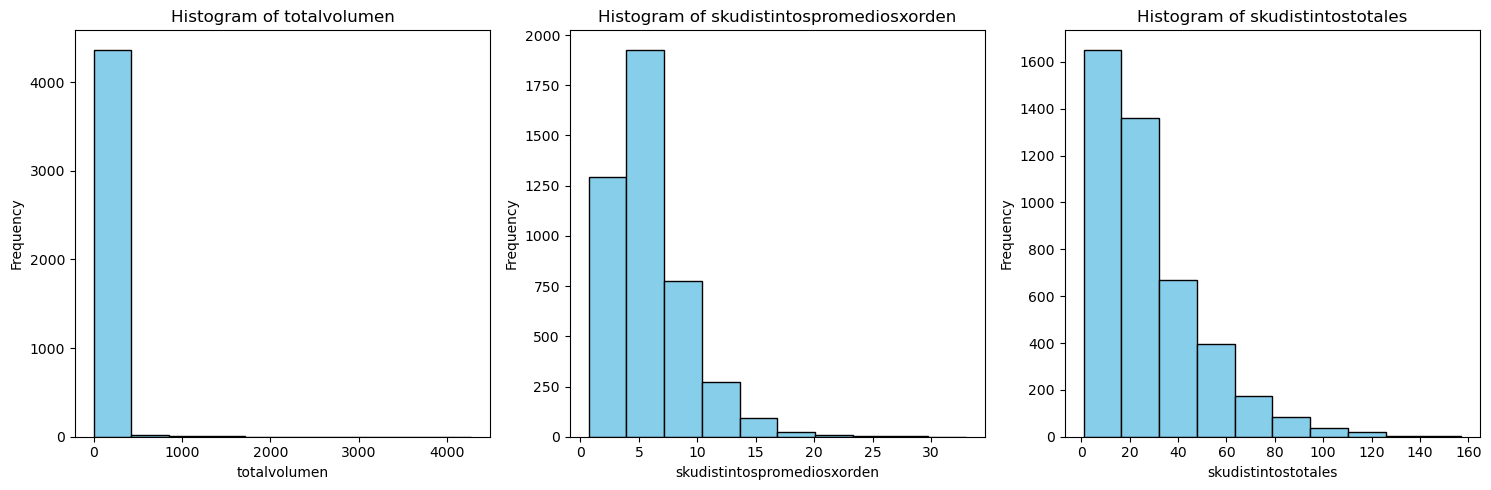

shape: (16, 2)
┌────────────┬────────────────────┐
│ volume_bin ┆ poc_distinct_count │
│ ---        ┆ ---                │
│ f64        ┆ u32                │
╞════════════╪════════════════════╡
│ 0.0        ┆ 4261               │
│ 100.0      ┆ 61                 │
│ 200.0      ┆ 28                 │
│ 300.0      ┆ 15                 │
│ 400.0      ┆ 7                  │
│ 500.0      ┆ 4                  │
│ 600.0      ┆ 5                  │
│ 700.0      ┆ 3                  │
│ 800.0      ┆ 3                  │
│ 900.0      ┆ 2                  │
│ 1000.0     ┆ 3                  │
│ 1100.0     ┆ 2                  │
│ 1200.0     ┆ 1                  │
│ 1300.0     ┆ 1                  │
│ 1600.0     ┆ 3                  │
│ 4200.0     ┆ 1                  │
└────────────┴────────────────────┘


In [26]:
# measures of central tendency for numerical data
print(atributes[numerical].describe())
plot_histograms(atributes, numerical)
# Contar los valores distintos de 'pocr' en bloques de 500 en la columna 'totalvolumen'
result = count_distinct_in_bins(atributes, volume_column="totalvolumen", column="poc", bin_size=100)
# Mostrar el resultado
print(result)

In [47]:
# Filtrar los resultados para mostrar solo aquellos clientes con volumen de compra menores o iguales a 100 (97% de los datos)
outliers = atributes.filter(pl.col("totalvolumen") > 100)
filtered_result = atributes.filter(pl.col("totalvolumen") <= 100)
print(filtered_result[numerical].describe())
outliers[numerical].describe()

shape: (9, 4)
┌────────────┬──────────────┬─────────────────────────────┬─────────────────────┐
│ statistic  ┆ totalvolumen ┆ skudistintospromediosxorden ┆ skudistintostotales │
│ ---        ┆ ---          ┆ ---                         ┆ ---                 │
│ str        ┆ f64          ┆ f64                         ┆ f64                 │
╞════════════╪══════════════╪═════════════════════════════╪═════════════════════╡
│ count      ┆ 4261.0       ┆ 4261.0                      ┆ 4261.0              │
│ null_count ┆ 0.0          ┆ 0.0                         ┆ 0.0                 │
│ mean       ┆ 10.555502    ┆ 5.949519                    ┆ 27.481342           │
│ std        ┆ 14.581388    ┆ 3.193991                    ┆ 21.533846           │
│ min        ┆ 0.02124      ┆ 0.75                        ┆ 1.0                 │
│ 25%        ┆ 2.03756      ┆ 3.7143                      ┆ 12.0                │
│ 50%        ┆ 5.31534      ┆ 5.2                         ┆ 21.0                │
│ 

statistic,totalvolumen,skudistintospromediosxorden,skudistintostotales
str,f64,f64,f64
"""count""",139.0,139.0,139.0
"""null_count""",0.0,0.0,0.0
"""mean""",381.454472,4.731182,38.604317
"""std""",470.928405,3.960411,22.200868
"""min""",100.71814,0.7027,3.0
"""25%""",135.84414,2.4831,24.0
"""50%""",231.26044,3.54,32.0
"""75%""",409.65216,5.2222,51.0
"""max""",4274.44416,25.6923,112.0


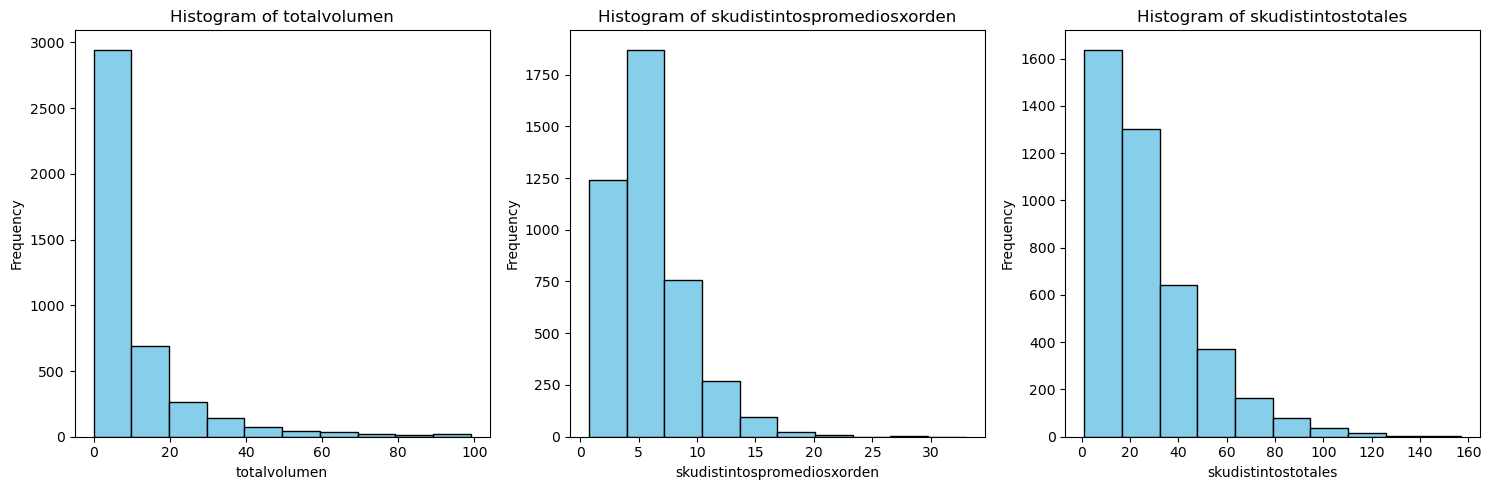

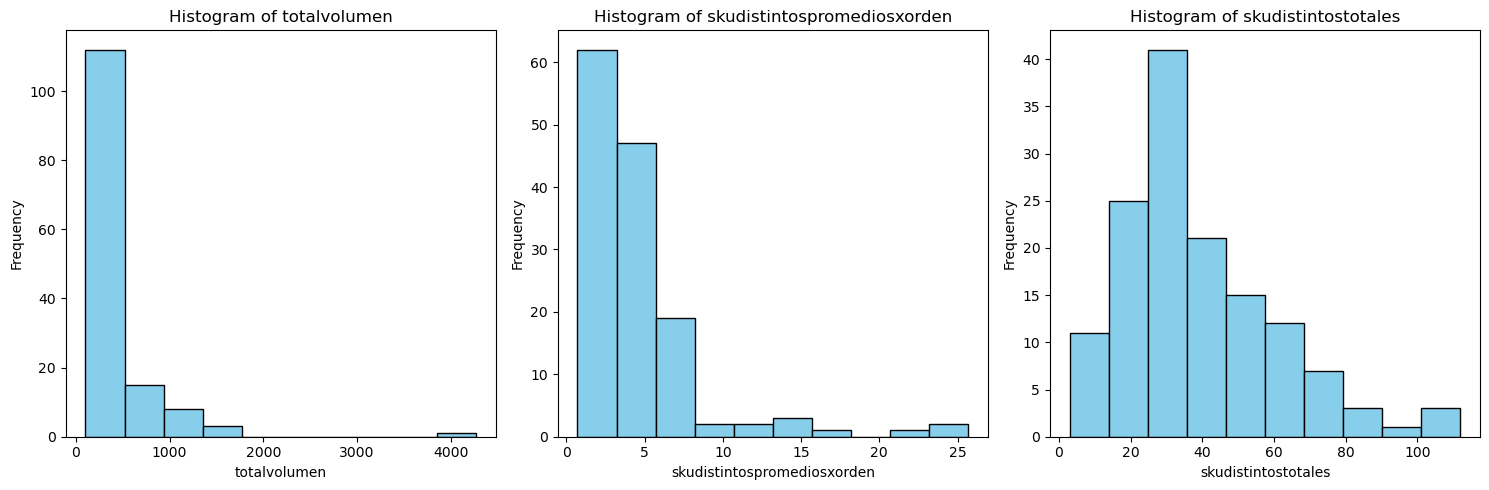

In [29]:

plot_histograms(filtered_result, numerical)
plot_histograms(outliers, numerical)

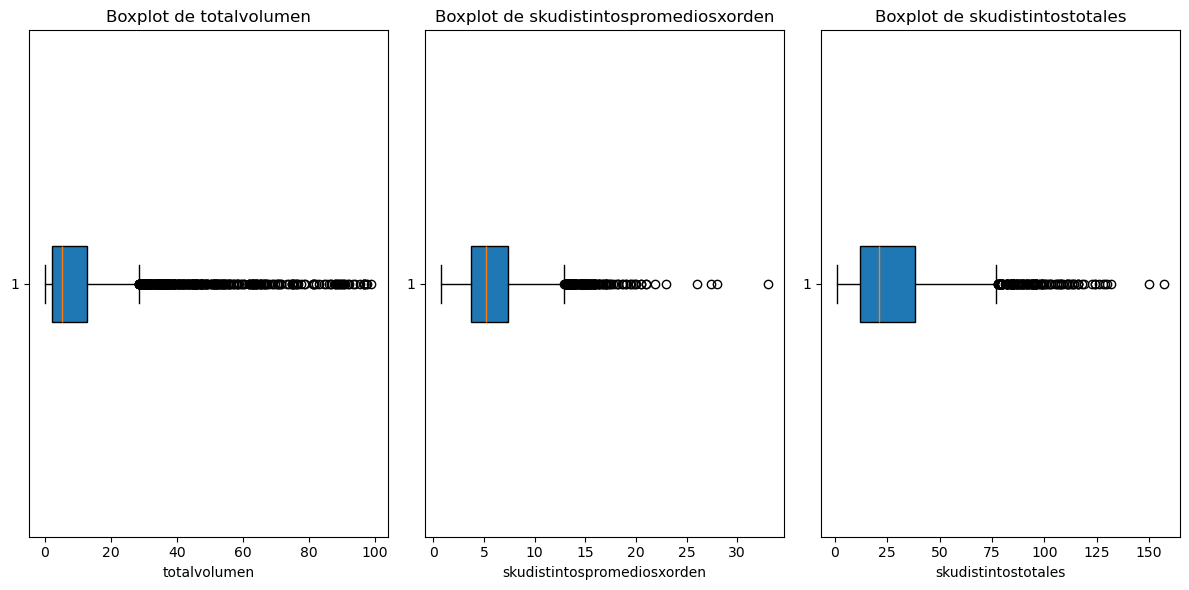

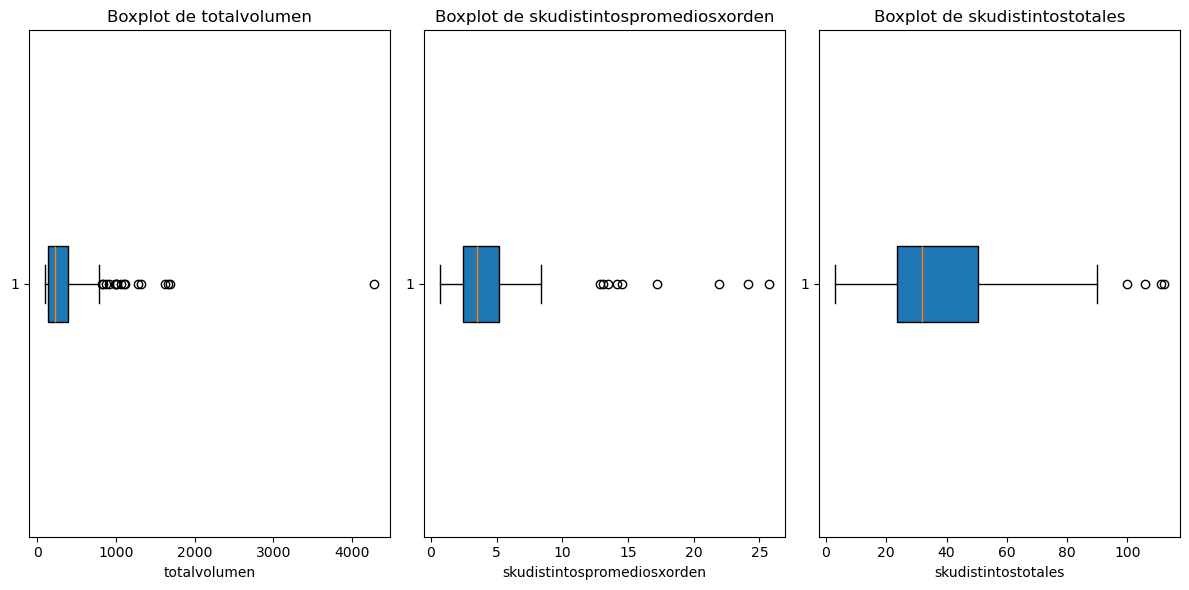

In [46]:
plot_boxplots(filtered_result, numerical)
plot_boxplots(outliers, numerical)

In [31]:
atributes.write_csv("../data/processed/atributes.csv")

### Datos de transacciones de los clientes

#### Calidad de los datos:
* Revisar valores nulos
* Revisar valores fuera de rango
* Cuantificar outliers

Transformaciones y/o agregaciones:

* Convertir invoice_date a un formato de fecha: Aunque actualmente es un entero,convertiremos la variable invoice_date a un tipo de dato de fecha para realizar análisis temporales.

* Crear dataset aparte con agrupación por cliente: Dado que estamos interesados en el comportamiento de compra de los clientes, vamos a agrupar los datos por account_id para analizar patrones de compra individuales.

* Crear dataset aparte con agrupación por item: Dado que también estamos interesados en el comportamiento de compra sobre los items, vamos a agrupar los datos por sku_id para analizar patrones de compra que se dan en general para los items.

##### Calidad de los datos:
* Revisar valores nulos --> No hay valores nulos en este dataset
* Revisar valores fuera de rango --> no se identifican valores fuera de rango (ejemplo: cantidad de bultos comprados del producto negativos )
* Cuantificar outliers --> vemos que hay bastantes outliers en la cantidad de bultos por SKU que se compran, lo cual no ocurre cuando vemos los datos como canastas y calculamos la cantidad de sku por canasta.

In [32]:
check_null_values(transactions)

column,null_count,null_percentage
str,u32,f64
"""""",0,0.0
"""account_id""",0,0.0
"""sku_id""",0,0.0
"""invoice_date""",0,0.0
"""order_id""",0,0.0
"""items_phys_cases""",0,0.0


In [33]:
transactions.head()

,account_id,sku_id,invoice_date,order_id,items_phys_cases
i64,i64,i64,i64,str,f64
0,430606,7038,20220729,"""512-3880249-0""",100.0
1,323267,14933,20220729,"""512-3882307-0""",1.0
2,357825,21971,20220723,"""512-3852880-0""",8.0
3,444926,7038,20220805,"""512-3913163-0""",20.0
4,450771,7030,20220816,"""512-3957000-0""",5.0


shape: (9, 2)
┌────────────┬───────────┐
│ statistic  ┆ value     │
│ ---        ┆ ---       │
│ str        ┆ f64       │
╞════════════╪═══════════╡
│ count      ┆ 280828.0  │
│ null_count ┆ 0.0       │
│ mean       ┆ 3.967979  │
│ std        ┆ 18.842399 │
│ min        ┆ 0.083333  │
│ 25%        ┆ 1.0       │
│ 50%        ┆ 1.0       │
│ 75%        ┆ 2.0       │
│ max        ┆ 2000.0    │
└────────────┴───────────┘


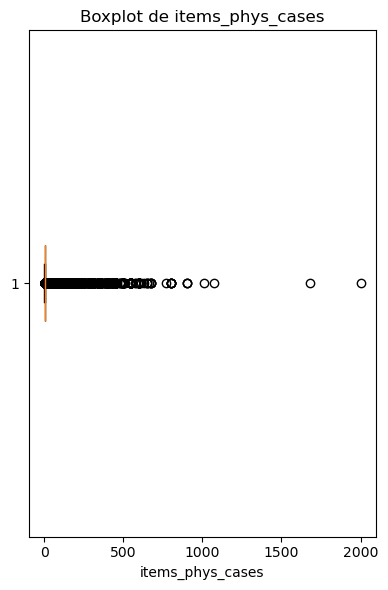

In [34]:
print(transactions['items_phys_cases'].describe())
plot_boxplots(transactions, ["items_phys_cases"])

shape: (9, 2)
┌────────────┬─────────┐
│ statistic  ┆ value   │
│ ---        ┆ ---     │
│ str        ┆ f64     │
╞════════════╪═════════╡
│ count      ┆ 45552.0 │
│ null_count ┆ 0.0     │
│ mean       ┆ 1.0     │
│ std        ┆ 0.0     │
│ min        ┆ 1.0     │
│ 25%        ┆ 1.0     │
│ 50%        ┆ 1.0     │
│ 75%        ┆ 1.0     │
│ max        ┆ 1.0     │
└────────────┴─────────┘


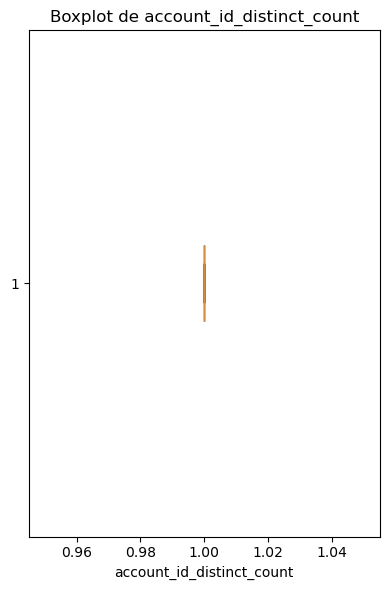

In [35]:
result = count_distinct_grouped_by(transactions, y_column="account_id", x_columns=['invoice_date','account_id',"order_id"],z_columns=['invoice_date','account_id',"order_id"])
print(result['account_id_distinct_count'].describe())
plot_boxplots(result, ["account_id_distinct_count"])

##### Transformaciones y/o agregaciones:

* Convertir invoice_date a un formato de fecha: Aunque actualmente es un entero,convertiremos la variable invoice_date a un tipo de dato de fecha para realizar análisis temporales.

* Crear dataset aparte de las canastas que es una agrupación por fecha-usuario-orden que contiene 1 o mas sku y que contiene 1 o más cantidades pedidas de cada sku

In [36]:
# Transform the f64 column to i64 (integer)
transactions = transactions.with_columns(
    pl.col("items_phys_cases").cast(pl.Int64).alias("items_phys_cases")
)
# Transform the f64 column to utf8 (string)
transactions = transactions.with_columns(pl.col("sku_id").cast(pl.Utf8))
transactions = transactions.with_columns(pl.col("order_id").cast(pl.Utf8))
transactions = transactions.with_columns(pl.col("account_id").cast(pl.Utf8))
transactions = transform_to_date(transactions, ['invoice_date'])
transactions.write_csv("../data/processed/transactions.csv")
transactions.head()

,account_id,sku_id,invoice_date,order_id,items_phys_cases
i64,str,str,date,str,i64
0,"""430606""","""7038""",2022-07-29,"""512-3880249-0""",100
1,"""323267""","""14933""",2022-07-29,"""512-3882307-0""",1
2,"""357825""","""21971""",2022-07-23,"""512-3852880-0""",8
3,"""444926""","""7038""",2022-08-05,"""512-3913163-0""",20
4,"""450771""","""7030""",2022-08-16,"""512-3957000-0""",5


In [37]:
# Now let's try to use the function
baskets = create_baskets(
    df=transactions,
    group_cols=['invoice_date','account_id','order_id'],
    list_col='sku_id',
    sum_cols=['items_phys_cases'],
    sort_cols=['invoice_date']
)
print(baskets .head())
# Save the DataFrame to a Parquet file
baskets.write_parquet("../data/processed/baskets.parquet")

shape: (5, 6)
┌──────────────┬────────────┬────────────────┬───────────────────┬──────────────┬──────────────────┐
│ invoice_date ┆ account_id ┆ order_id       ┆ sku_id            ┆ sku_id_count ┆ items_phys_cases │
│ ---          ┆ ---        ┆ ---            ┆ ---               ┆ ---          ┆ ---              │
│ date         ┆ str        ┆ str            ┆ list[str]         ┆ u32          ┆ i64              │
╞══════════════╪════════════╪════════════════╪═══════════════════╪══════════════╪══════════════════╡
│ 2022-05-24   ┆ 74556      ┆ 102-38960010-0 ┆ ["7038", "25030", ┆ 3            ┆ 5                │
│              ┆            ┆                ┆ "7026"]           ┆              ┆                  │
│ 2022-05-24   ┆ 377860     ┆ 102-38958976-0 ┆ ["7651", "23902"] ┆ 2            ┆ 2                │
│ 2022-05-24   ┆ 391399     ┆ 512-3605195-0  ┆ ["18361",         ┆ 12           ┆ 69               │
│              ┆            ┆                ┆ "16667", …        ┆           

## EDA --> Preguntas a contestar

**Sobre las clientes**
* ¿A cúantos clientes se les debe hacer recomendación?
* ¿Cuánto compran los clientes?
* Si los categorizo por:
    * Segmento de negocio
    * Concentración
    * NSE
    * Segmento único
    * Canal
¿Hay diferencias significativas?
¿Hay relación entre los clientes de las distintas categorías?
  
* ¿Con qué frecuencia los clientes realizan compras?
* ¿Cómo varía la frecuencia de compra a lo largo del tiempo?
* ¿Cuál es la cantidad de clientes que compran por item disponible para recomendación?
* ¿Cuál es el tiempo entre compras consecutivas de los cliente?
* ¿Existen clientes con comportamiento de compra repetitivo? ¿Quienes?
* ¿Cómo se comportan las diferentes cohortes de clientes a lo largo del tiempo?
* ¿Cómo evolucionan las ventas en diferentes cohortes?


**Sobre las canastas**
* ¿Cúanto es el gasto por canasta?
* ¿Cuantas canastas compran los clientes?
* ¿Cuántos items compran por canasta?



**Sobre los items**
* ¿Cuál es la cantidad total de items disponibles para recomendación?
* ¿Cuál es la cantidad de items por canasta?
* ¿Cuál es la cantidad de items por cliente disponible para recomendación?

**Anomalias**

* ¿Existen anomalías o irregularidades en la distribución de fechas de compra?
* ¿Cómo afectan estas anomalías al negocio?

### Análisis sobre los clientes 

##### ¿A cúantos clientes se les debe hacer recomendación? ¿Cuánto compran los clientes en cada compra? ¿Con qué frecuencia los clientes realizan compras?
 
* R: hay 4400 clientes en la base de datos de atributos y 4535 en la de transacciones.  

* R: De las transacciones registradas, podemos notar que se compran, en promedio, 5.7 productos distintos y 17 unidades por compra. También sabemos, por el dataset de atributos , que el 75% de los clientes compró 14 helectrolitros o menos pero que hubo algunos pocos que pasaron los 100 y llegaron hasta 4274. 

In [38]:
group_and_describe_with_percentiles(baskets, "account_id", ['sku_id_count','items_phys_cases']).select(pl.all().mean())

account_id,sku_id_count_mean,items_phys_cases_mean,sku_id_count_median,items_phys_cases_median,sku_id_count_std_dev,items_phys_cases_std_dev,sku_id_count_p25,sku_id_count_p50,sku_id_count_p75,items_phys_cases_p25,items_phys_cases_p50,items_phys_cases_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
null,5.722985,16.955941,5.499669,15.488864,2.354361,9.086522,4.427122,5.705182,7.014333,11.71731,16.16097,21.396251


In [39]:
print(transactions.select('account_id').unique().height)
print(transactions.select('sku_id').unique().height)
# measures of central tendency for numerical data
print(atributes.select('poc').unique().height)
atributes[numerical].describe()

4535
530
4400


statistic,totalvolumen,skudistintospromediosxorden,skudistintostotales
str,f64,f64,f64
"""count""",4400.0,4400.0,4400.0
"""null_count""",0.0,0.0,0.0
"""mean""",22.272537,5.911031,27.832727
"""std""",106.642437,3.227491,21.640289
"""min""",0.02124,0.7027,1.0
"""25%""",2.12124,3.6667,12.0
"""50%""",5.6011,5.1429,22.0
"""75%""",13.95536,7.3542,38.0
"""max""",4274.44416,33.0,157.0


#### Si los categorizo ¿Hay diferencias significativas en la categoría? ¿Estas categorías son independientes entre si? 

A continuación se presentan los resultados por categoría

* Segmento de negocio : aunque es homogenea, es importante notar que solo un 21% de los clientes tiene un nivel de uso bajo o nulo de la aplicación (potencialmente descartable para el MVP)
* Concentración : No es homogenea y la concentración de otros negocios de otra índole a 150mts2 es de un 90% su agrupamos los niveles alto y medio 
* NSE : No es homogenea y es importante notar que un 23% está sin datos
* Segmento único: No es homogenea y los clientes con capacidad media de compra son el 61%, mientras que el 20% es de baja y el 17% es de alta, el resto no tiene datos
* Canal : el 88% de los clientes pertenece al canal tradidicional, Kioscos o Maxikioscos  o Comida

* Las categorías no son independientes entre si

In [40]:
results = count_unique_values(atributes, categorical)
results

{'bussinesssegment': 4, 'concentracion': 3, 'segmentounico': 5, 'canal': 11}

In [41]:
print(count_distinct_grouped_by(atributes, y_column="poc", x_columns=["bussinesssegment"],z_columns=["poc_percentage"]))
group_and_describe_with_percentiles(atributes, "bussinesssegment", numerical)

shape: (4, 4)
┌──────────────────┬────────────────────┬────────────────────┬────────────────┐
│ bussinesssegment ┆ poc_distinct_count ┆ total_first_column ┆ poc_percentage │
│ ---              ┆ ---                ┆ ---                ┆ ---            │
│ str              ┆ u32                ┆ i32                ┆ f64            │
╞══════════════════╪════════════════════╪════════════════════╪════════════════╡
│ HighUsage        ┆ 1213               ┆ 4400               ┆ 27.568182      │
│ PowerUsage       ┆ 1213               ┆ 4400               ┆ 27.568182      │
│ MediumUsage      ┆ 1050               ┆ 4400               ┆ 23.863636      │
│ MinimalUsage     ┆ 924                ┆ 4400               ┆ 21.0           │
└──────────────────┴────────────────────┴────────────────────┴────────────────┘


bussinesssegment,totalvolumen_mean,skudistintospromediosxorden_mean,skudistintostotales_mean,totalvolumen_median,skudistintospromediosxorden_median,skudistintostotales_median,totalvolumen_std_dev,skudistintospromediosxorden_std_dev,skudistintostotales_std_dev,totalvolumen_p25,totalvolumen_p50,totalvolumen_p75,skudistintospromediosxorden_p25,skudistintospromediosxorden_p50,skudistintospromediosxorden_p75,skudistintostotales_p25,skudistintostotales_p50,skudistintostotales_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""MediumUsage""",18.248128,5.894914,22.829524,4.39482,5.125,18.0,62.725376,3.405179,17.453096,1.68592,4.40312,10.92036,3.5714,5.125,7.3333,10.0,18.0,30.0
"""MinimalUsage""",12.052428,5.919149,15.71645,2.22977,5.1048,12.0,69.843063,3.20535,12.983267,0.84192,2.23986,6.23052,3.5833,5.1429,7.4545,6.0,12.0,21.0
"""HighUsage""",30.913514,5.819817,30.54493,6.39194,5.0,25.0,163.597805,3.183269,21.541211,2.79046,6.39194,15.22056,3.625,5.0,7.2308,15.0,25.0,42.0
"""PowerUsage""",24.900324,6.010012,38.680956,9.49644,5.3103,33.0,84.9562,3.129854,24.185367,4.5829,9.49644,18.75456,3.8333,5.3103,7.375,20.0,33.0,51.0


In [42]:
print(count_distinct_grouped_by(atributes, y_column="poc", x_columns=["concentracion"],z_columns=["poc_percentage"]))
group_and_describe_with_percentiles(atributes, "concentracion", numerical)

shape: (3, 4)
┌───────────────┬────────────────────┬────────────────────┬────────────────┐
│ concentracion ┆ poc_distinct_count ┆ total_first_column ┆ poc_percentage │
│ ---           ┆ ---                ┆ ---                ┆ ---            │
│ str           ┆ u32                ┆ i32                ┆ f64            │
╞═══════════════╪════════════════════╪════════════════════╪════════════════╡
│ Alto          ┆ 2319               ┆ 4400               ┆ 52.704545      │
│ Medio         ┆ 1954               ┆ 4400               ┆ 44.409091      │
│ Bajo          ┆ 127                ┆ 4400               ┆ 2.886364       │
└───────────────┴────────────────────┴────────────────────┴────────────────┘


concentracion,totalvolumen_mean,skudistintospromediosxorden_mean,skudistintostotales_mean,totalvolumen_median,skudistintospromediosxorden_median,skudistintostotales_median,totalvolumen_std_dev,skudistintospromediosxorden_std_dev,skudistintostotales_std_dev,totalvolumen_p25,totalvolumen_p50,totalvolumen_p75,skudistintospromediosxorden_p25,skudistintospromediosxorden_p50,skudistintospromediosxorden_p75,skudistintostotales_p25,skudistintostotales_p50,skudistintostotales_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Bajo""",19.218336,5.156998,23.330709,6.01514,4.4211,15.0,70.596346,2.633552,22.222559,2.32184,6.01514,13.63538,3.1818,4.4211,6.65,10.0,15.0,32.0
"""Alto""",19.318276,6.483111,30.451488,5.64996,5.75,24.0,74.823073,3.461682,23.165108,2.05066,5.64996,14.39806,4.0,5.75,8.125,13.0,24.0,43.0
"""Medio""",25.977151,5.281097,25.0174,5.53681,4.61065,20.0,136.47339,2.823124,19.200367,2.24466,5.537,13.3329,3.3333,4.6111,6.4211,11.0,20.0,33.0


In [43]:
print(count_distinct_grouped_by(atributes, y_column="poc", x_columns=["segmentounico"],z_columns=["poc_percentage"]))
group_and_describe_with_percentiles(atributes, "segmentounico", numerical)

shape: (5, 4)
┌───────────────┬────────────────────┬────────────────────┬────────────────┐
│ segmentounico ┆ poc_distinct_count ┆ total_first_column ┆ poc_percentage │
│ ---           ┆ ---                ┆ ---                ┆ ---            │
│ str           ┆ u32                ┆ i32                ┆ f64            │
╞═══════════════╪════════════════════╪════════════════════╪════════════════╡
│ 4.Activos     ┆ 1934               ┆ 4400               ┆ 43.954545      │
│ 1.Inactivos   ┆ 888                ┆ 4400               ┆ 20.181818      │
│ 2.Masivos     ┆ 820                ┆ 4400               ┆ 18.636364      │
│ 5.Select      ┆ 631                ┆ 4400               ┆ 14.340909      │
│ 3.Potenciales ┆ 127                ┆ 4400               ┆ 2.886364       │
└───────────────┴────────────────────┴────────────────────┴────────────────┘


segmentounico,totalvolumen_mean,skudistintospromediosxorden_mean,skudistintostotales_mean,totalvolumen_median,skudistintospromediosxorden_median,skudistintostotales_median,totalvolumen_std_dev,skudistintospromediosxorden_std_dev,skudistintostotales_std_dev,totalvolumen_p25,totalvolumen_p50,totalvolumen_p75,skudistintospromediosxorden_p25,skudistintospromediosxorden_p50,skudistintospromediosxorden_p75,skudistintostotales_p25,skudistintostotales_p50,skudistintostotales_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""4.Activos""",18.454372,6.101257,30.858842,7.619305,5.375,26.0,51.234575,3.15085,19.749052,3.2891,7.62095,15.78716,3.8667,5.375,7.5,16.0,26.0,41.0
"""2.Masivos""",9.583716,5.770779,19.503659,4.3525,5.04285,16.0,25.447217,3.214566,14.506745,1.77432,4.3571,7.7421,3.5769,5.05,7.2,9.0,16.0,27.0
"""3.Potenciales""",47.831755,8.503668,33.645669,11.991,7.7857,31.0,181.278135,3.670715,16.539768,6.4103,11.991,26.50188,6.3571,7.7857,10.8,23.0,31.0,43.0
"""5.Select""",73.224607,6.874734,50.275753,17.38062,6.0147,47.0,245.73012,3.671826,25.971597,8.34152,17.38062,37.51956,4.25,6.0147,8.9815,30.0,47.0,67.0
"""1.Inactivos""",2.444146,4.570655,12.154279,1.5582,4.125,11.0,3.545036,2.339944,8.181279,0.73942,1.55904,2.95866,3.0,4.125,5.6667,6.0,11.0,16.0


In [44]:
print(count_distinct_grouped_by(atributes, y_column="poc", x_columns=["canal"],z_columns=["poc_percentage"]))
group_and_describe_with_percentiles(atributes, "canal", numerical)

shape: (11, 4)
┌─────────────────────┬────────────────────┬────────────────────┬────────────────┐
│ canal               ┆ poc_distinct_count ┆ total_first_column ┆ poc_percentage │
│ ---                 ┆ ---                ┆ ---                ┆ ---            │
│ str                 ┆ u32                ┆ i32                ┆ f64            │
╞═════════════════════╪════════════════════╪════════════════════╪════════════════╡
│ Tradicional         ┆ 2665               ┆ 4400               ┆ 60.568182      │
│ Kioscos/Maxikioscos ┆ 821                ┆ 4400               ┆ 18.659091      │
│ COMIDA              ┆ 415                ┆ 4400               ┆ 9.431818       │
│ Autoservicio        ┆ 186                ┆ 4400               ┆ 4.227273       │
│ BEBIDA              ┆ 101                ┆ 4400               ┆ 2.295455       │
│ ENTRETENIMIENTO     ┆ 79                 ┆ 4400               ┆ 1.795455       │
│ Mayorista           ┆ 53                 ┆ 4400               ┆ 1.2045

canal,totalvolumen_mean,skudistintospromediosxorden_mean,skudistintostotales_mean,totalvolumen_median,skudistintospromediosxorden_median,skudistintostotales_median,totalvolumen_std_dev,skudistintospromediosxorden_std_dev,skudistintostotales_std_dev,totalvolumen_p25,totalvolumen_p50,totalvolumen_p75,skudistintospromediosxorden_p25,skudistintospromediosxorden_p50,skudistintospromediosxorden_p75,skudistintostotales_p25,skudistintostotales_p50,skudistintostotales_p75
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""OTROS REF""",4.28747,6.7125,14.1875,4.05886,6.03845,9.5,3.170279,3.261597,10.380872,0.93462,4.33632,6.6012,3.875,6.0769,10.0,6.0,11.0,25.0
"""KA Minoristas""",33.19843,5.952689,23.111111,8.93561,4.4197,17.0,52.849231,3.645564,14.76438,4.8864,9.42046,28.58948,3.0,4.9,7.2857,11.0,17.0,34.0
"""ENTRETENIMIENTO""",18.038128,7.284276,19.860759,6.78,6.5,14.0,38.813941,3.717107,16.571318,2.64,6.78,16.2,4.5,6.5,9.6667,8.0,14.0,29.0
"""BEBIDA""",32.453697,6.20932,18.118812,7.8888,5.625,15.0,69.455122,3.226456,13.862386,2.05506,7.8888,36.06468,3.75,5.625,8.0,7.0,15.0,24.0
"""Autoservicio""",54.523032,5.562718,52.973118,26.16478,4.80625,51.0,128.684808,3.149527,29.279535,15.1704,26.32674,45.93754,3.5882,4.8095,6.381,36.0,51.0,68.0
"""Tradicional""",16.825898,5.765766,27.815385,5.113,5.0,22.0,73.298865,3.16468,20.998598,2.09766,5.113,11.05942,3.5714,5.0,7.1389,12.0,22.0,38.0
"""Bar/Restaurant""",25.168753,7.095233,27.333333,20.70388,8.125,28.0,17.600543,2.461856,9.0185,20.70388,20.70388,44.57174,8.125,8.125,8.875,28.0,28.0,36.0
"""COMIDA""",17.925747,6.894312,22.821687,8.10584,6.4,21.0,27.53412,3.226332,15.072835,2.6552,8.10584,22.82666,4.5,6.4,8.7,10.0,21.0,31.0
"""Kioscos/Maxikioscos""",14.823838,5.849775,27.830694,4.40692,5.0,21.0,84.713668,3.314463,22.342115,1.61206,4.40692,11.12188,3.6,5.0,7.1667,11.0,21.0,38.0


#### ¿Con qué frecuencia los clientes realizan compras?

#### ¿Cuál es la cantidad de clientes que compran por item disponible para recomendación?

In [45]:
baskets.head()

invoice_date,account_id,order_id,sku_id,sku_id_count,items_phys_cases
date,str,str,list[str],u32,i64
2022-05-24,"""74556""","""102-38960010-0""","[""7038"", ""25030"", ""7026""]",3,5
2022-05-24,"""377860""","""102-38958976-0""","[""7651"", ""23902""]",2,2
2022-05-24,"""391399""","""512-3605195-0""","[""18361"", ""16667"", … ""1659""]",12,69
2022-05-24,"""443775""","""512-3602396-0""","[""21972"", ""24118"", … ""14933""]",4,5
2022-05-24,"""165294""","""512-3603476-0""","[""19089"", ""19086"", … ""77812""]",13,26


#### ¿Cuál es la cantidad de clientes que compran por item disponible para recomendación?
* ¿Cuál es el tiempo entre compras consecutivas de los cliente?
* ¿Cuál es la frecuencia de compra por cliente?
* ¿Existen clientes con comportamiento de compra repetitivo? ¿Quienes?
* ¿Cómo se comportan las diferentes cohortes de clientes a lo largo del tiempo?
* ¿Cómo evolucionan las ventas en diferentes cohortes?